In [12]:
library(ggplot2)
library(wordcloud)
library(tm)
library(RColorBrewer)
library(slam)
library(naivebayes)

In [13]:
df <- read.csv('train.csv', header = T)
df <- df[1:5000,]
head(df, 5)

,Labels,Text,Text_Tag
,<int>,<chr>,<chr>
1,1,Says the Annies List political group supports third-trimester abortions on demand.,abortion
2,2,When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.,"energy,history,job-accomplishments"
3,3,"Hillary Clinton agrees with John McCain ""by voting to give George Bush the benefit of the doubt on Iran.""",foreign-policy
4,1,Health care reform legislation is likely to mandate free sex change surgeries.,health-care
5,2,The economic turnaround started at the end of my term.,"economy,jobs"


In [14]:
dimensions <- dim(df)
dimensions

[1] 5000    3

Meaning of the label
- Barely-True - 0
- False - 1
- Half-True - 2
- Mostly-True - 3
- Not-Known - 4
- True - 5

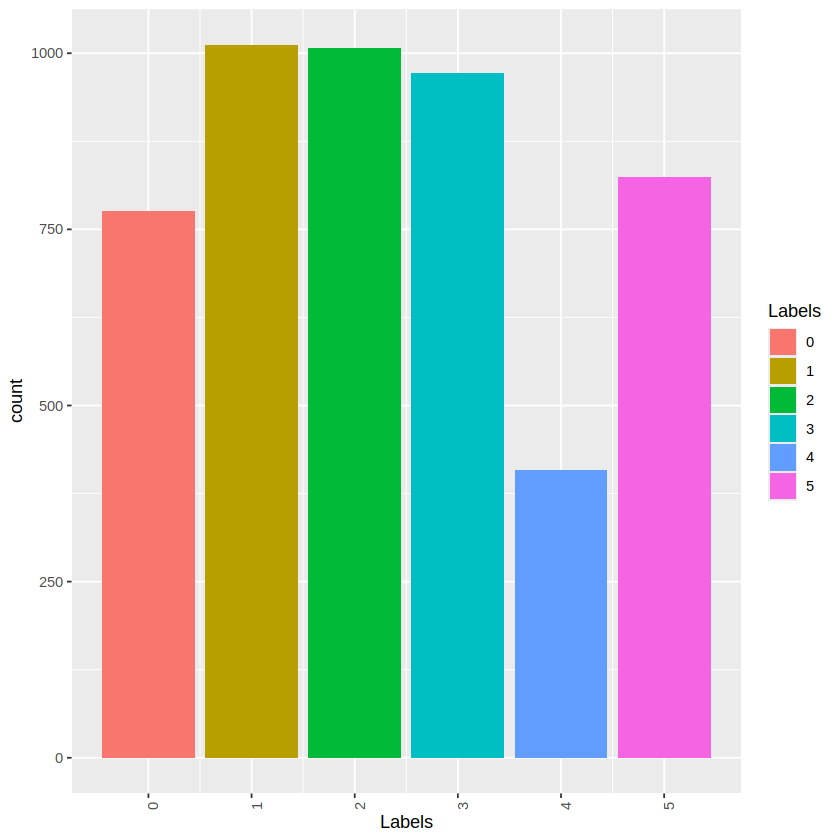

In [15]:
ggplot(data = df, aes(x = Labels, fill = as.factor(Labels))) +
  geom_bar() +
  scale_x_continuous(breaks = unique(df$Labels)) + # Ensure all x-axis labels are shown
  labs(x = 'Labels', fill = 'Labels') + # Add labels for x-axis and legend
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) # Rotate x-axis labels for better visibility

Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("en")):
“transformation drops documents”


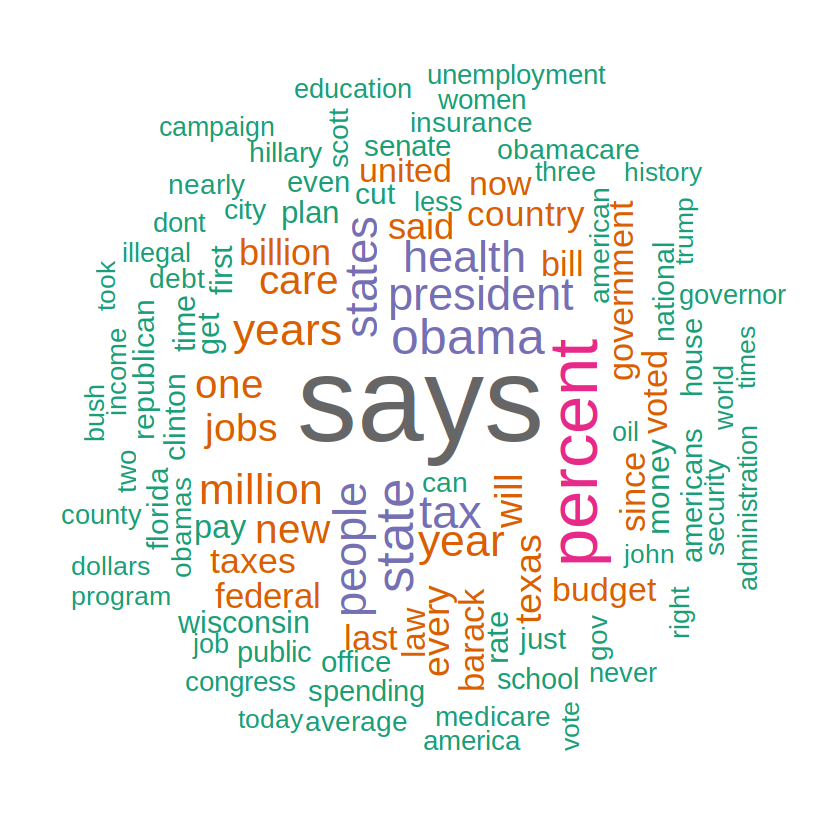

In [16]:
# word cloud for the text

train_qs <- as.character(df$Text)

text_combined <- paste(train_qs, collapse = " ")

corpus <- Corpus(VectorSource(text_combined))
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, removeWords, stopwords("en"))

wordcloud(corpus, scale = c(6, 1), max.words = 100, random.order = FALSE,
          colors = brewer.pal(8, "Dark2"), rot.per = 0.35, 
          use.r.layout = FALSE)

par(mar = c(1, 1, 1, 1))

Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("en")):
“transformation drops documents”


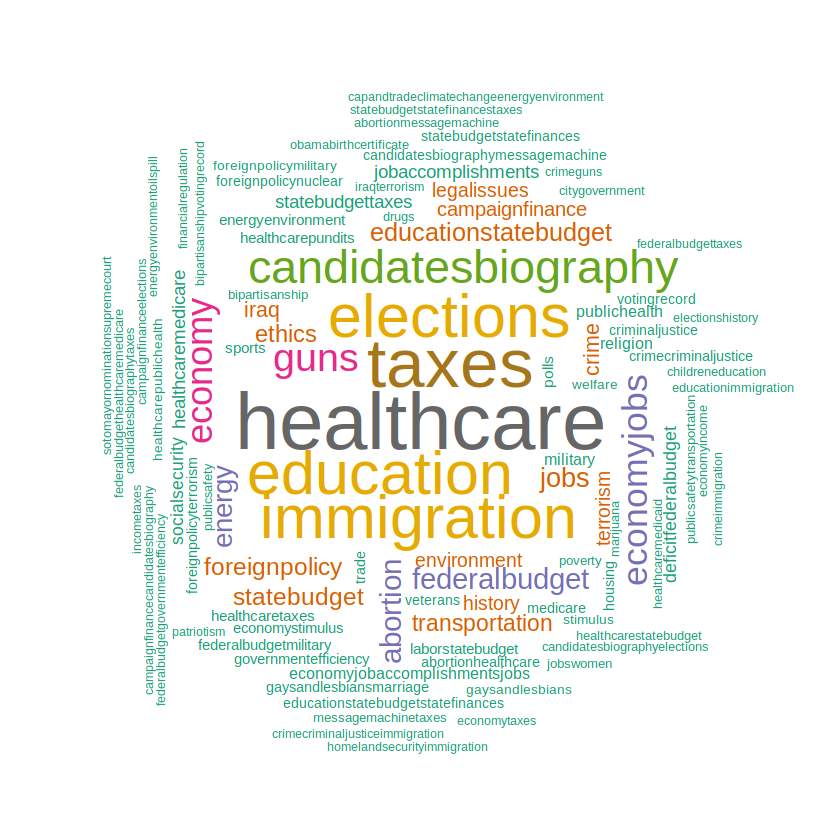

In [17]:
# word cloud for the text_tag

train_qs <- as.character(df$Text_Tag)

text_combined <- paste(train_qs, collapse = " ")

corpus <- Corpus(VectorSource(text_combined))
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, removeWords, stopwords("en"))

wordcloud(corpus, scale = c(4, 0.5), max.words = 100, random.order = FALSE,
          colors = brewer.pal(8, "Dark2"), rot.per = 0.35, 
          use.r.layout = FALSE)

par(mar = c(1, 1, 1, 1))

In [18]:
library(tm)
library(SnowballC)

# Definire le parole di stop in inglese
stopset <- stopwords("en")

# Creare una funzione per la vettorizzazione TF-IDF
vectorize_tfidf <- function(docs) {
  # Creare un corpus
  corpus <- Corpus(VectorSource(docs))
  
  # Applicare trasformazioni al testo
  corpus <- tm_map(corpus, content_transformer(tolower))  # Converti in minuscolo
  corpus <- tm_map(corpus, removePunctuation)             # Rimuovi la punteggiatura
  corpus <- tm_map(corpus, removeNumbers)                 # Rimuovi i numeri
  corpus <- tm_map(corpus, removeWords, stopset)          # Rimuovi le stop words
  corpus <- tm_map(corpus, stripWhitespace)               # Rimuovi spazi bianchi extra
  corpus <- tm_map(corpus, content_transformer(function(x) iconv(x, to="ASCII//TRANSLIT")))  # Rimuovi accenti
  
  # Creare una matrice di documenti-termine
  dtm <- as.data.frame(as.matrix(DocumentTermMatrix(corpus)))
  
  # row_sums <- rowSums(dtm)
  # dtm <- dtm / row_sums
  
  return(dtm)
}

# Esempio di utilizzo con un vettore di testi
texts <- c("This is a sample document cazzone.", "This document is another example cazzon diobestia.")
tfidf_matrix <- vectorize_tfidf(texts)

print(tfidf_matrix)


Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”


Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopset):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, content_transformer(function(x) iconv(x, :
“transformation drops documents”


  cazzone document sample another cazzon diobestia example
1       1        1      1       0      0         0       0
2       0        1      0       1      1         1       1


In [19]:
x <- vectorize_tfidf(df$Text)

# Aggiungere le etichette al data frame
x$Labels <- as.factor(df$Labels)

print(x)

Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
“transformation drops documents”


Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopset):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, content_transformer(function(x) iconv(x, :
“transformation drops documents”


   abortions annies demand group list political says supports thirdtrimester
1          1      1      1     1    1         1    1        1              1
2          0      0      0     0    0         0    0        0              0
3          0      0      0     0    0         0    0        0              0
4          0      0      0     0    0         0    0        0              0
5          0      0      0     0    0         0    0        0              0
6          0      0      0     0    0         0    0        0              0
7          0      0      0     0    0         0    0        0              0
8          0      0      0     0    0         0    0        0              0
9          0      0      0     0    0         0    0        0              0
10         0      0      0     0    0         0    1        0              0
11         0      0      0     0    0         0    0        0              0
   administration begin bushs coal decline gas george natural president star

In [20]:
dim(x)

[1] 5000 8539

In [21]:
# head(x, 5)

In [22]:
model <- naive_bayes(Labels ~ ., data = x)